In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys
import time
import random

# Import external libraries
import numpy as np
from scipy.stats import zscore

In [3]:
import math
import numpy as np
def replaceNan(matrix):
    for row in range(0, matrix.shape[0]):
        for col in range(0, matrix.shape[1]):

            if math.isnan(matrix[row, col]):
                matrix[row, col] = np.longdouble('0')
    return None

In [4]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import zscore

def feature_select_imp_cnl(data, label, top_f_features):
    # np.random.seed(1);
    model = ExtraTreesClassifier(n_estimators=100, random_state=1)
    label = np.ravel(label)
    model.fit(data, label)

    importances = model.feature_importances_
    # print(importances)

    f_indices = np.argsort(importances)[::-1]
    # print(f_indices)

    selected_features = f_indices[0:top_f_features]
    # print(selected_features)

    importances2 = importances[selected_features]
    # print(importances2)

    # output = np.concatenate((selected_features.reshape((-1,1)), importances2.reshape((-1,1))),axis=1)
    # np.savetxt('featureImportance_nslkdd.csv', output, delimiter=',' , fmt='%f')

    return selected_features, importances2

In [5]:
def one_hot_m(y, n_classes):
    ret = np.zeros((y.shape[0], n_classes))
    for i in range(0, n_classes):
        for j in range(0, len(y)):
            if y[j] == (i + 1):
                ret[j, i] = 1
    return ret

In [6]:
import numpy as np
"""
    Function that decodes the lables predicted using BLS algorithms. It returns 'ret' (a column
    vector for labels).
        result(x)
        'x' are the labels with 'n' columns, where 'n' is the number of the classes
"""
def result(x):
	ret = np.zeros( (1, x.shape[0]) )

	for i in range(0, x.shape[0]):

		v_max = float("-inf")
		v_ind = 0

		for j in range(0, x.shape[1]):
			if v_max < x[i, j]:
				v_max = x[i, j]
				v_ind = j

		ret[0, i] = v_ind + 1

	ret = ret.transpose()

	return ret

In [7]:
import numpy as np

from scipy.stats import zscore
from numpy.linalg import solve
"""
    Function that shrinks a value 'x' and returns the shrinked value'z.'
        shrinkage(x,kappa)
        'x' is the value that will be shrinked.
        'kappa' is the shrinkage parameter.
"""
def shrinkage(x, kappa):
    m1 = x - kappa;
    m2 = -1 * x - kappa;

    for i in range(0, len(m1)):
        for j in range(0, len(m1[i, :])):
            if m1[i, j] < 0:
                m1[i, j] = 0.0;

    for i in range(0, len(m2)):
        for j in range(0, len(m2[i, :])):
            if m2[i, j] < 0:
                m2[i, j] = 0.0;

    z = m1 - m2;
    return z;

"""
Function that (write purpose of funciton here). It returns 'wk.'
sparce_bls(A, b, lam, itrs)
'A' is a matrix with the output of the function mapminmax in the generation of mapped
features.
'b' is the original data points of the trainining dataset.
'lam' is 1e-3 (default).
'itrs' is 50  (default).
"""

def sparse_bls(A, b, lam, itrs):
    AA = np.dot(A.transpose(), A)

    m = A.shape[1]
    n = b.shape[1]
    x = np.zeros((m, n))

    wk = x
    ok = x
    uk = x

    L1 = solve((AA + np.identity(m)), np.identity(m))

    L2 = np.dot(np.dot(L1, A.transpose()), b)

    for i in range(0, itrs):
        tempc = ok - uk
        ck = L2 + np.dot(L1, tempc)
        ok = shrinkage(ck + uk, lam)
        uk = uk + (ck - ok)
        wk = ok

    return wk


In [8]:

# Import the Python libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np


class My_MinMaxScaler(MinMaxScaler):

    def __init__(self, feature_range=(0, 1), copy=True):
        MinMaxScaler.__init__(self, feature_range);

    """
    Function that scales an input matrix.
        my_fit(self, X, y=None, my_data_min=None, my_data_max=None, min_val=-1, max_val=1)
        'X' is the input data matrix.
        'y' is the output matrix. It is initialized with the value "None."
        'my_data_min' is the initial minimum value. It is initialized with the value "None."
        'my_data_max' is the initial minimum value. It is initialized with the value "None."
        'min_val' is the minimum value of each row in 'X'. It is initialized with the value "-1."
        'max_val' is the maximum value of each row 'X'. It is initialized with the value "1."
    """

    def my_fit(self, X, y=None, my_data_min=None, my_data_max=None, min_val=-1, max_val=1):

        data_min = np.array(my_data_min);
        my_data_max = np.array(my_data_max);
        data_range = my_data_max - data_min;

        # Do not scale constant features
        if isinstance(data_range, np.ndarray):
            data_range[data_range == 0.0] = 1.0
        elif data_range == 0.:
            data_range = 1
        self.scale_ = (max_val - min_val) / data_range
        self.min_ = min_val - data_min * self.scale_
        self.data_range = data_range
        self.data_min = data_min
        return self

    """
    Function that maps the row minimum and maximum values to [-v_min v_max]. It returns
    'matrix,' 'max_list,' and 'min_list' (explain matrix, max_list, and min_list)
        mapminmax(matrix, v_min = -1, v_max = 1, l_max = None, l_min = None)
        'matrix' is the input matrix.
        'v_min' is the row minimum value. It is initialized with the value "-1."
        'v_max' is the row maximum value. It is initialized with the value "1."
        'l_max' is used in the initalize max_list. It is initialized with the value "None."
        'l_min' is used to initialize min_list. It is initialized with the value "None."
    """


def mapminmax(matrix, v_min=-1, v_max=1, l_max=None, l_min=None):
    max_list = [];
    min_list = [];

    if l_max is None and l_min is None:
        max_list = np.max(matrix, axis=1);
        min_list = np.min(matrix, axis=1);
        matrix = matrix.astype(float);
        min_max_scaler = preprocessing.MinMaxScaler(feature_range=(v_min, v_max));
        matrix = min_max_scaler.fit_transform(matrix.transpose()).transpose();
    else:
        matrix = matrix.astype(float);
        min_max_scaler = My_MinMaxScaler(feature_range=(v_min, v_max));
        min_max_scaler.my_fit(X=matrix, my_data_min=l_min, my_data_max=l_max, min_val=v_min, max_val=v_max);
        matrix = min_max_scaler.transform(matrix.transpose()).transpose();

    return matrix, max_list, min_list;


In [9]:
# Import the Python libraries
import os
import sys
import time
import random
import math

# Import external libraries
import numpy as np
from scipy.stats import zscore
from scipy.linalg import orth
from numpy.linalg import inv

import matplotlib.pyplot as plt
# Import customized libraries
# sys.path.append("..")

from sklearn import preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


from tensorflow.python.keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, Dense

from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, Dense
from keras.layers import BatchNormalization
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

from keras.optimizers import Adam
from keras import regularizers


import tensorflow as tf
import datetime

from sklearn.model_selection import train_test_split

def cnn_train_realtime(train_x, train_y, test_x,
                       ):
    """

    """
    print("Training - begin")
    time_start = time.time()


    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)


    # making the deep learning function
    def model():
        input_shape = 37
        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                         padding='same', input_shape=(input_shape, 1)))
        model.add(BatchNormalization())

        # adding a pooling layer
        model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

        model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                         padding='same', input_shape=(input_shape, 1)))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

        model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                         padding='same', input_shape=(input_shape, 1)))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

        model.add(Flatten())
        model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.3)))
        model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.3)))

        model.add(Dense(2, activation='softmax'))

        lr = 0.00001  # learning rate
        optimizer = Adam(learning_rate=lr)
        # optimizer = Adam()
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model
    model = model()
    print(model.summary())
    # log_dir = "../logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    logger = CSVLogger('logs.csv', append=True)
    # his = model.fit(train_x, train_y, epochs=20, batch_size=64,
    #                 callbacks=[logger])

    his = model.fit(X_train, y_train, epochs=30, batch_size=64,
              validation_data=(X_test, y_test)
              # , callbacks=[tensorboard_callback]
                    )

    # check the model performance on test data
    predicted = model.predict(test_x)

    print("predicted:",predicted)

    print((train_x.shape))
    print((train_y[:5]))


    import matplotlib.pyplot as plt
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(his.history['accuracy'])
    plt.plot(his.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(his.history['loss'])
    plt.plot(his.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()


    # train_y.shape(), test_x.shape()


    # time_end = time.time()
    # Training_time = time_end - time_start
    #
    # # Training - end
    #
    # print("Training has been finished!");
    # print("The Total Training Time is : ", Training_time, " seconds");
    #
    # ### Training Accuracy
    # print("xx.shape", xx.shape)
    # print("xx", xx)
    # yy = result(xx);
    # train_yy = result(train_y);
    #
    # cnt = 0;
    # for i in range(0, len(yy)):
    #     if yy[i] == train_yy[i]:
    #         cnt = cnt + 1;
    #
    # TrainingAccuracy = cnt * 1.0 / train_yy.shape[0];
    #
    # print("Training Accuracy is : ", TrainingAccuracy * 100, " %");
    #
    # ### Testing Process
    # # Testing - begin
    # time_start = time.time()
    # test_x = zscore((test_x).transpose(), axis=0, ddof=1).transpose();
    #
    # HH1 = np.concatenate((test_x, 0.1 * np.ones((test_x.shape[0], 1))), axis=1);
    # yy1 = np.zeros((test_x.shape[0], N2 * N1));
    #
    #
    #
    # time_end = time.time()
    # Testing_time = time_end - time_start
    #
    # # Testing - end
    #
    # print("Testing has been finished!");
    # print("The Total Testing Time is : ", Testing_time, " seconds");
    #
    # ### Testing accuracy
    # y = result(x)
    # predicted = y
    #
    # del TT3
    predicted = [[1.], [2.], [2.], [2.], [2.]]
    TrainingAccuracy, Training_time, Testing_time = 0.9, 0.5, 0.2
    return TrainingAccuracy, Training_time, Testing_time, predicted


In [10]:
import os
import sys
import time
import random

# Import external libraries
import numpy as np
from scipy.stats import zscore

def cnn_demo_train_test(num_features='all', mem='low'):
    print("cnn_demo_train_test")
    # Disable
    def blockPrint():
        sys.stdout = open(os.devnull, 'w')

    # Restore
    def enablePrint():
        sys.stdout = sys.__stdout__

    # blockPrint()
    # enablePrint()

    print("Load the datasets")
    # path_app = "src"

    path_app = "/content/drive/MyDrive/NYIT/INCS_870/CyberDefense-main/src"
    train_dataset0 = np.loadtxt("/%s/data_historical/Code_Red_I.csv" % path_app, delimiter=",")
    train_dataset0 = np.loadtxt("/%s/data_historical/Code_Red_I.csv" % path_app, delimiter=",")
    train_dataset1 = np.loadtxt("/%s/data_historical/Nimda.csv" % path_app, delimiter=",")
    train_dataset2 = np.loadtxt("/%s/data_historical/Slammer.csv" % path_app, delimiter=",")
    train_dataset3 = np.loadtxt("/%s/data_historical/Moscow_blackout.csv" % path_app, delimiter=",")
    train_dataset4 = np.loadtxt("/%s/data_historical/WannaCrypt.csv" % path_app, delimiter=",")
    train_dataset5 = np.loadtxt("/%s/data_historical/RIPE_regular.csv" % path_app, delimiter=",")
    train_dataset6 = np.loadtxt("/%s/data_historical/BCNET_regular.csv" % path_app, delimiter=",")

    test_dataset = np.loadtxt('/%s/data_test/DUMP_out.txt' % path_app)

    print("Combine training data")
    # Combine training data
    train_dataset_list = [train_dataset1, train_dataset2, train_dataset3,
                          # train_dataset4,
                          train_dataset5, train_dataset6]

    train_dataset = train_dataset0
    for train_data in train_dataset_list:
        train_dataset = np.concatenate((train_dataset, train_data), axis=0)
    # np.savetxt('./train_dataset.csv', train_dataset, delimiter=',', fmt='%.4f')

    print("train_dataset:",type(train_dataset))

    row_index_end = train_dataset.shape[0] - train_dataset.shape[0] % 100  # divisible by 100
    train_x = train_dataset[:row_index_end, 4:-1]
    train_x = zscore(train_x, axis=0, ddof=1)  # For each feature, mean = 0 and std = 1
    replaceNan(train_x)  # Replace "nan" with 0
    train_y = train_dataset[:row_index_end, -1]

    # Change training labels
    inds1 = np.where(train_y == -1)
    train_y[inds1] = 2

    # new process test data #
    test_x = test_dataset[:, 4:]

    # Normalize test data
    test_x = zscore(test_x, axis=0, ddof=1)  # For each feature, mean = 0 and std = 1
    replaceNan(test_x)  # Replace "nan" with 0
    # test_y = test_dataset[:, -1];

    # # Change test labels
    # inds2 = np.where(test_y == 0);
    # test_y[inds2] = 2;

    # feature selection - begin
    if num_features != 'all':
        num_features = int(num_features)
        features, _ = feature_select_imp_cnl(train_x, train_y, num_features)
        train_x = train_x[:, features]
        test_x = test_x[:, features]
    # feature selection - end

    # BLS parameters
    seed = 1  # set the seed for generating random numbers
    num_class = 2  # number of the classes
    epochs = 1  # number of epochs



    train_y = one_hot_m(train_y, num_class)
    # test_y = one_hot_m(test_y, num_class);
    #######################


    train_err = np.zeros((1, epochs))
    train_time = np.zeros((1, epochs))
    test_time = np.zeros((1, epochs))


    # CNN ----------------------------------------------------------------
    print("======================= CNN =======================\n")
    np.random.seed(seed)  # set the seed for generating random numbers
    for j in range(0, epochs):
        trainingAccuracy, trainingTime, testingTime, predicted = \
            cnn_train_realtime(train_x, train_y, test_x
                                )

        train_err[0, j] = trainingAccuracy * 100
        train_time[0, j] = trainingTime
        test_time[0, j] = testingTime

    enablePrint()
    print("trn acc:", trainingAccuracy)

    # predicted = [[1.], [2.], [2.], [2.], [2.]]
    predicted_list = []
    for label in predicted:
        predicted_list.append(label[0])

    # string to the front-end
    web_results = []
    test_hour_chart = []
    test_min_chart = []
    test_hour, test_min = test_dataset[:, 1], test_dataset[:, 2]
    for label, hour, minute in zip(predicted, test_hour, test_min):
        hour, minute = int(hour), int(minute)
        hour = str(hour)
        if len(hour) == 1:
            hour = '0' + hour
        minute = str(minute)
        if len(minute) == 1:
            minute = '0' + minute
        if label == 1:
            print("\n Detection time (HH:MM) %s : %s => An anomaly is detected!" % (hour, minute))
            web_results.append("Detection time (HH:MM) %s : %s => An anomaly is detected!" % (hour, minute))
        else:
            print("\n Detection time (HH:MM) %s : %s => Normal traffic" % (hour, minute))
            web_results.append("Detection time (HH:MM) %s : %s => Normal traffic" % (hour, minute))
        test_hour_chart.append(hour)
        test_min_chart.append(minute)


    return predicted_list, test_hour_chart, test_min_chart, web_results

In [11]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming train_dataset is already loaded and is a NumPy array
# # Convert it to a pandas DataFrame for easier data analysis
# # Let's assume the last column is the target variable and the rest are features

# path_app = "/content/drive/MyDrive/NYIT/INCS_870/CyberDefense-main/src"
# train_dataset0 = np.loadtxt("/%s/data_historical/Code_Red_I.csv" % path_app, delimiter=",")
# train_dataset0 = np.loadtxt("/%s/data_historical/Code_Red_I.csv" % path_app, delimiter=",")
# train_dataset1 = np.loadtxt("/%s/data_historical/Nimda.csv" % path_app, delimiter=",")
# train_dataset2 = np.loadtxt("/%s/data_historical/Slammer.csv" % path_app, delimiter=",")
# train_dataset3 = np.loadtxt("/%s/data_historical/Moscow_blackout.csv" % path_app, delimiter=",")
# train_dataset4 = np.loadtxt("/%s/data_historical/WannaCrypt.csv" % path_app, delimiter=",")
# train_dataset5 = np.loadtxt("/%s/data_historical/RIPE_regular.csv" % path_app, delimiter=",")
# train_dataset6 = np.loadtxt("/%s/data_historical/BCNET_regular.csv" % path_app, delimiter=",")

# test_dataset = np.loadtxt('/%s/data_test/DUMP_out.txt' % path_app)

# print("Combine training data")
# # Combine training data
# train_dataset_list = [train_dataset1, train_dataset2, train_dataset3,
#                       # train_dataset4,
#                       train_dataset5, train_dataset6]

# train_dataset = train_dataset0
# for train_data in train_dataset_list:
#     train_dataset = np.concatenate((train_dataset, train_data), axis=0)
# # np.savetxt('./train_dataset.csv', train_dataset, delimiter=',', fmt='%.4f')
# columns = ['Feature_{}'.format(i) for i in range(train_dataset.shape[1]-1)] + ['Target']
# df = pd.DataFrame(train_dataset, columns=columns)

# # Basic Statistical Summary
# print(df.describe())

# # Check for Missing Values
# print(df.isnull().sum())

# # Correlation Analysis
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
# plt.title('Correlation Analysis')
# plt.show()

# # Distribution of Features
# df.drop('Target', axis=1).hist(bins=50, figsize=(20, 15))
# plt.suptitle('Feature Distribution')
# plt.show()

# # Box Plot for Outlier Detection
# plt.figure(figsize=(20, 10))
# df.drop('Target', axis=1).boxplot()
# plt.title('Outlier Detection with Box Plot')
# plt.show()

# # Scatter plot for each feature against the target to visualize their linear relationship
# for col in df.columns[:-1]:  # excluding the target column
#     df.plot(kind='scatter', x=col, y='Target', alpha=0.5)
#     plt.title(f'Scatter plot of {col} against Target')
#     plt.show()


cnn_demo_train_test
Load the datasets
Combine training data
train_dataset: <class 'numpy.ndarray'>
======================= CNN =======================

Training - begin
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 37, 64)            448       
                                                                 
 batch_normalization (Batch  (None, 37, 64)            256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 64)            24640     
                                                                 
 batch_normalizatio

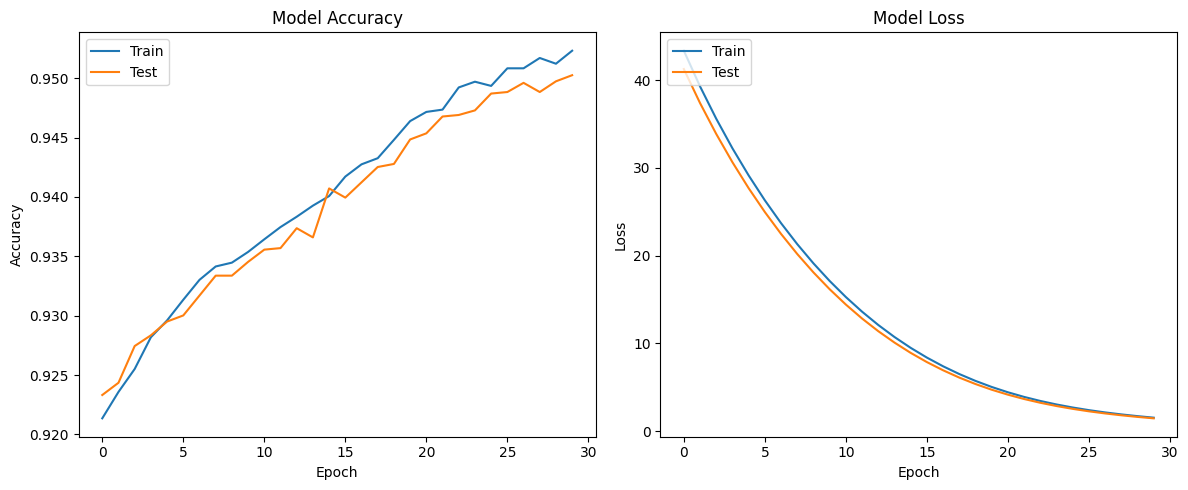

([1.0, 2.0, 2.0, 2.0, 2.0],
 ['05', '05', '05', '05', '05'],
 ['15', '16', '17', '18', '19'],
 ['Detection time (HH:MM) 05 : 15 => Normal traffic',
  'Detection time (HH:MM) 05 : 16 => Normal traffic',
  'Detection time (HH:MM) 05 : 17 => Normal traffic',
  'Detection time (HH:MM) 05 : 18 => Normal traffic',
  'Detection time (HH:MM) 05 : 19 => Normal traffic'])

In [12]:
cnn_demo_train_test()

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
# # 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 设置XGBoost参数
params = {
    'objective': 'binary:logistic',  # 二分类的逻辑回归问题
    'max_depth': 4,                  # 树的最大深度
    'alpha': 0.01,                   # L1正则化项的权重
    'learning_rate': 0.01,           # 学习速率
    'n_estimators': 100              # 树的个数
}

# 初始化XGBoost分类器
clf = xgb.XGBClassifier(**params)

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


NameError: name 'train_x' is not defined